Marc Sarrias Díez 1671525
Alex Bes Álvarez  1680795

### **CAS KAGGLE. NEW YORK AIRBNB**

Hem decidit escollir el cas Kaggle [Data Exploration on NYC Airbnb](https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb), del qual analitzarem el conjunt de dades i discutirem els resultats.

Des de 2008, Airbnb ha permès als hostes i als clients oferir i gaudir experiències de viatge més personalitzades. L’anàlisi de les dades dels milions d’allotjaments disponibles és clau per entendre el comportament de clients i hostes, útil en temes de seguretat, per prendre decisions de negoci, guiar iniciatives de màrqueting i millorar el servei.


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### **EDA | Exploratory Data Analysis**

Primerament, farem una anàlisi per comprendre el conjunt de dades: identificarem possibles valors NaN i com els tractarem, examinarem les relacions entre els atributs i altres característiques rellevants.


In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [66]:

print("Info:")
df.info()

# Hay NaNs
df.isna().sum()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review               

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Podem observar que la base de dades conté un total de 16 atributs i 48.895 registres d’Airbnb, la qual cosa representa una gran quantitat de dades per analitzar.

Els atributs inclouen tant valors numèrics (`int` i `float`) com valors de tipus object (`strings`).

A més, alguns atributs presenten valors faltants (NaNs), concretament: `name` (16 NaNs), `host_name` (21 NaNs), `last_review` (10.052 NaNs) i `reviews_per_month` (10.052 NaNs).


Veient les dades, podem identificar alguns atributs que no són rellevants per al nostre anàlisi, com ara `name`, `id`, `host_name` i `last_review`. Per aquest motiu, hem eliminat aquestes columnes del DataFrame amb la instrucció:

In [68]:
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True, errors='ignore')
df


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


Assumim que els valors NaN a la columna `reviews_per_month` es deuen a que aquests allotjaments mai han rebut cap ressenya. Per aquest motiu, imputarem aquests valors amb 0, de manera que aquestes files puguin ser incloses en l’anàlisi sense distorsionar els resultats.


In [70]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
df.isna().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Ara que no tenim cap valor NaN a la nostra base de dades, podem continuar amb l’anàlisi.

A continuació, examinarem la correlació entre les variables numèriques. Hem seleccionat les columnes de tipus `int` i `float` i hem calculat la correlació utilitzant el mètode de Kendall:


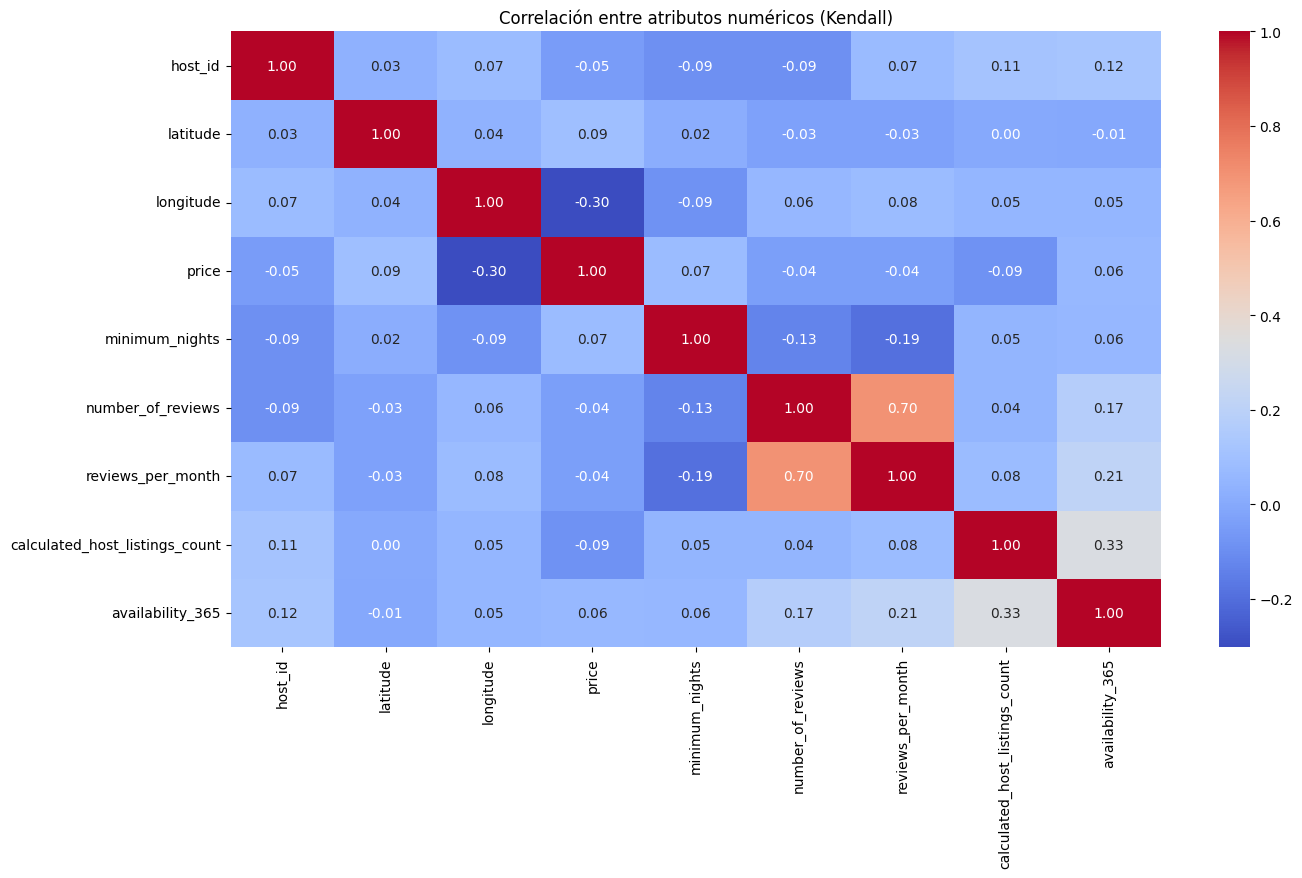

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_cols.corr(method='kendall')


plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación entre atributos numéricos (Kendall)")
plt.show()

Resulats Correlació

//////////////////OTROS//////////////////////////////

Relació neighbourgroup and Availability of Room

C:\Users\Marc\AppData\Local\Temp\ipykernel_7184\2278072684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')


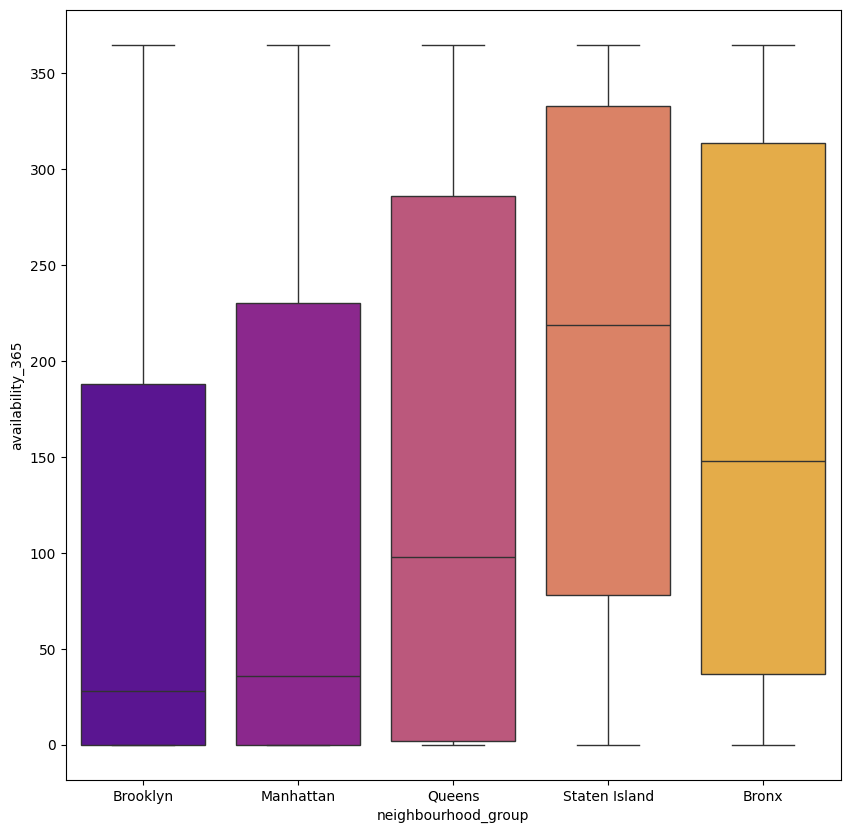

In [56]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')